In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Flight_Ticket_Price.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
df.drop(columns=['Unnamed: 0','flight'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


#### The data is completely filled and has no missing values

### Problem Statement: To build a machine learning model to predict the flight fare based on parameters such as airline, source, destination, departure time, arrival times, total stops, duration, and many other features.

### Goal: To help travellers and airline companies estimate flight prices efficiently and optimize travel decisions

In [13]:
# Data types
df.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

#### Now, lets's drop the duplicate rows in the data

In [16]:
df=df.drop_duplicates()

In [18]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Exploratory Data Analysis (EDA)

<Axes: xlabel='airline', ylabel='price'>

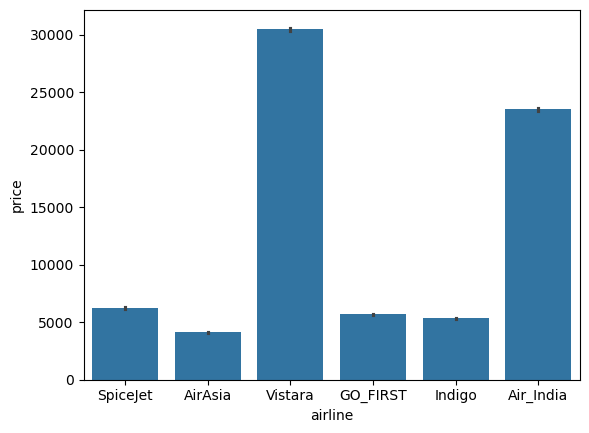

In [21]:
# Distribution of ticket prices across different airlines.
sns.barplot(data=df,x='airline',y='price')

<Axes: xlabel='stops', ylabel='price'>

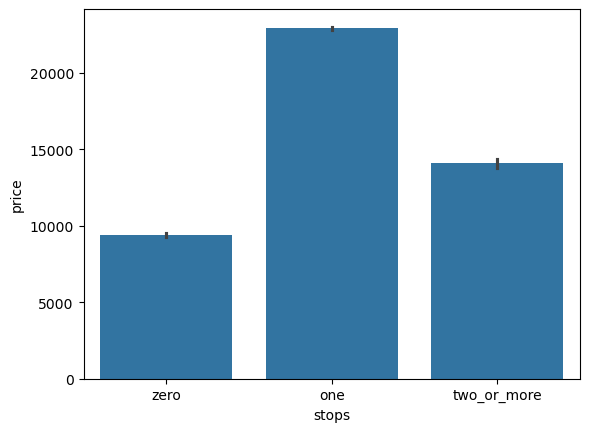

In [22]:
# Impact of number of stops on ticket price.
sns.barplot(data=df,x='stops',y='price')

<Axes: xlabel='class', ylabel='price'>

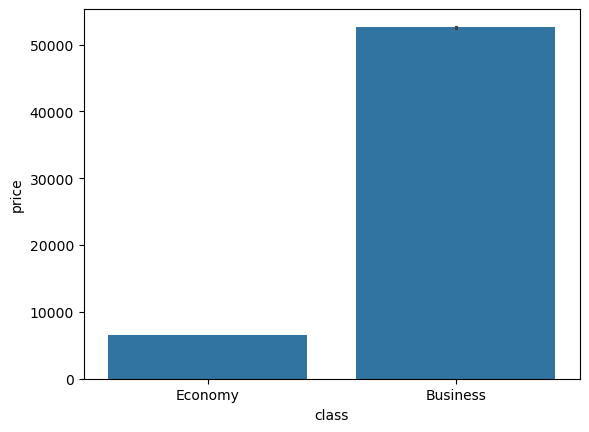

In [23]:
# Effect of travel class on ticket cost.
sns.barplot(data=df,x='class',y='price')

<Axes: ylabel='price'>

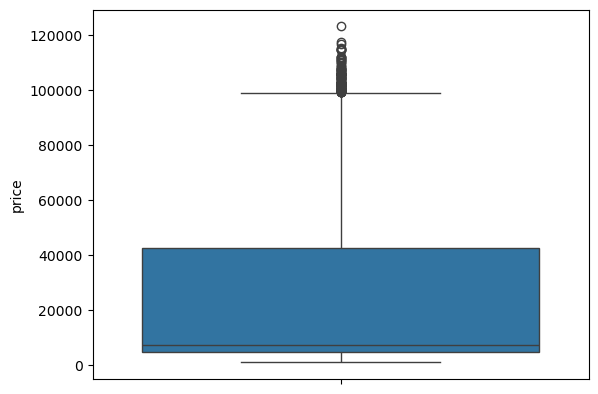

In [24]:
# outlier detection in price column (target variable)
sns.boxplot(df['price'])

In [29]:
# lets select the target variable
y=df['price']
y.shape

(297940,)

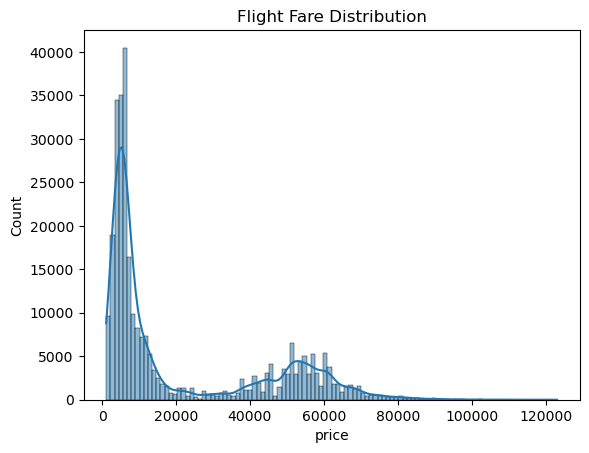

In [31]:
#lets check for the distribution of target variable
sns.histplot(y,kde=True)
plt.title('Flight Fare Distribution')
plt.show()

In [32]:
# predictor variable
X=df.drop(columns='price')
X.shape

(297940, 9)

In [35]:
#### Now split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(238352, 9)
(238352,)
(59588, 9)
(59588,)


#### Hyper Parameter Tuning

In [87]:
#Using Grid Search to find the best K value
from sklearn.model_selection import GridSearchCV
param_grid = {'kneighborsregressor__n_neighbors': range(1, 21)}
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'kneighborsregressor__n_neighbors': 5}
Best CV score: 0.9721273310774992


#### Let's apply column transformer on the data

### KNN

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,RobustScaler
transformer=ColumnTransformer(transformers=[('t1',OrdinalEncoder(),[0,1,2,3,4,5,6]),('t2',RobustScaler(),[7,8])],remainder='passthrough')
pipe=make_pipeline(transformer,KNeighborsRegressor(n_neighbors=5,weights='distance'))

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', RobustScaler(),
                                                  [7, 8])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(weights='distance'))])

In [42]:
y_pred=pipe.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9739128406148869

In [47]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

3673.7659370633583

In [49]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

1693.4487880464148

### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
pipe2 = make_pipeline(transformer, DecisionTreeRegressor(random_state=42))

In [53]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', RobustScaler(),
                                                  [7, 8])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [55]:
y_pred=pipe2.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9756119186857989

In [59]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

3552.114074221273

In [61]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

1193.5929857241952

### Linear Regressor

In [105]:
from sklearn.linear_model import LinearRegression
pipe1=make_pipeline(transformer,LinearRegression())

In [107]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', RobustScaler(),
                                                  [7, 8])])),
                ('linearregression', LinearRegression())])

In [109]:
y_pred=pipe1.predict(X_test)

In [111]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9058349307428323

In [113]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

6963.3346527919075

In [115]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

4617.805503591152

### Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
pipe3=make_pipeline(transformer,RandomForestRegressor())

In [71]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', RobustScaler(),
                                                  [7, 8])])),
                ('randomforestregressor', RandomForestRegressor())])

In [73]:
y_pred=pipe3.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9848441204944544

In [77]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

2800.19747200939

In [79]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

1097.9869586341422

### XG Boost Regressor

In [81]:
from xgboost import XGBRegressor
pipe5 = make_pipeline(transformer, XGBRegressor(random_state=42))

In [83]:
pipe5.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', RobustScaler(),
                                                  [7, 8])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [85]:
y_pred=pipe5.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9758456945419312

In [89]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

3535.0487323823772

In [91]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

2018.2548998489374

In [101]:
import pickle

with open('random_forest_regression.pkl','wb') as f:
    pickle.dump(pipe3,f)

In [103]:
with open(r'random_forest_regression.pkl','rb') as f:
    model=pickle.load(f)

In [105]:
model.predict([['Vistara','Delhi','Morning','zero','Morning','Mumbai','Economy',2.33,1]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([7354.12])